# In this python code we are using dec2vec to extract features from the text. Later these features can be used to train classifier. 

Looks like youve enabled AdBlock. Ads suck. Why dont you try the new Premium It has everything you know and love but with p fulllength videos and NO ADS.Ã—

[ 1.]
[u'', u'ad', u'ad blocker', u'adblock', u'adblocker', u'ads', u'advertising', u'block', u'blocker', u'browser', u'click', u'detected', u'disable', u'disable adblock', u'free', u'page', u'site', u'thank', u'using', u'website']


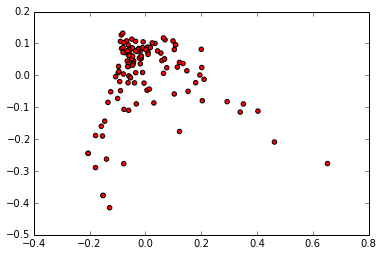

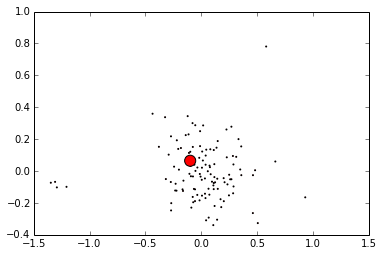

In [82]:
# gensim modules
%matplotlib inline

#nltk.download()
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
import gensim.models.doc2vec as doc2vec
import numpy as np
from random import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn import svm
import nltk
from nltk.collocations import *
from nltk.collocations import *
from nltk.metrics import *
import random
from itertools import chain
import matplotlib.pyplot as plt
import matplotlib.font_manager




def labelizeReviews(reviews, label_type,i):
    labelized = []
    
    label = '%s_%s'%(label_type,i)
    #labelized.append(LabeledSentence(reviews, [label])	
    return LabeledSentence(reviews.split(), [label])


def bigramWordFeatures(words,score_fn=BigramAssocMeasures.chi_sq,n=20):
    #ignored_words = nltk.corpus.stopwords.words('english')
    bigram_finder=BigramCollocationFinder.from_words(words)
    #bigram_finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
    bigrams=bigram_finder.nbest(score_fn,n)
    return dict([(ngram, True) for ngram in chain(words, bigrams)])
    

def cleanText(corpus):
    punctuation = """.,?!:;(){}[]"""
    corpus = corpus.replace('\n','')
    corpus = corpus.replace('<br />', ' ')

    #treat punctuation as individual words
    for c in punctuation:
        corpus = corpus.replace(c, ' %s '%c)
    
    return corpus



adblocking_lines= ['Looks like youve enabled AdBlock. Ads suck. Why don\'t you try the new Premium? It has everything you know and love but with, full-length videos and NO ADS.',
                   'AD-BLOCK DETECTED - PLEASE SUPPORT PASTEBIN BY BUYING A PRO ACCOUNT For only $2.95 you can unlock loads of extra features, and support Pastebin\'s development at the same time.pastebin.com/pro',
                   'Disable Adblock!',
                   'Please enable from your AdBlocker so that we can offer you our services also zukunftig free. Why Advertising Fcir urbia.de is important ',
                   'Welcome Dear Visitor Its your right to block ads. After all, its your browser. But its also our right to protect the integrity of our published product. But without advertising-income, we cant keep making www.SadeemPC.com awesome. Ive disabled my ad blocker. Lets get on with it!',
                   'As you might have guessed... We block adblockers here ourselves. This entire page can be edited and customized using the BlockAdblock Configurator I understand I have disabled my ad blocker. Let me in! ',
                   'Were glad you stopped by! But please understand that without advertising this website wouldnt be here. We serve responsible ads and ask that you disable your ad blocker while visiting. We also offer the option of becoming a supporting member of this site. No ads and extra perks to make your stay even better! To get started click Store and then Membership Subscription from the menu at the top of any page...but first youll need to whitelist this site (at least temporarily). Please click here after you have disabled your adblocker on this site',
                   'News in Levels is free for you thanks to ads. Please turn off your ad blocker. Thank you very much!'
                   'Dear users our editors develop quality articles on health for you. Thus we can offer the content for free we finance ourselves through advertising. This only works if it can be also displayed. To surf on our website please deactivate your Adblocker for Onmeda.de and then reload the page. Tips for deactivating we have provided for you: For PC / laptop users for smartphone / tablet users Your OnmedaTeam',
                   'Hi! We can see that you use Adblock in your browser and therefore do not see our advertisers messages on this site. Our digital newsrooms are financed through advertising sales and therefore we offer only our editorial content to users who are willing to receive messages from our advertisers. Alternatively you can choose a months adfree access for only 19 kr. Refresh the page after you have turned Adblock from Buy one months adfree access for 19 DKK Do you already have a user and paid for content? click here',
                   'Hello You use your browser in a module / extension (Ghostery Avira AdBlock or similar) that blocks The display of advertising on the site. Without revenues from advertising (the only of VoyageForum) it is impossible to pay lhébergement Site (multiple powerful servers) as well as the salaries of people who develop and ladministrent. Ie without The display of advertising on the site VoyageForum (like most web sites) can not just stay on the line ... please disable this module / extension in your browser when you browse VoyageForum. Advertising keeps VoyageForum (and the vast majority of sites) free and accessible to all ... To know how to uninstall a module / extension in your browser click here. Important: If you still see this red message after uninstallation of the module concerned Make sure that your antivirus software is not blocking too certain advertisements on the pages of the site (such as advertisements in the white squares in the right column pages). Thank you for your cooperation and understanding. VoyageForum team',
                   'Access to your Dama.bg is limited because use application for suspension of ad formats. Dama.bg independent media and the only way your favorite content reaches free to you is through advertising. Thank you for your understanding. If you want to keep reading quality content in Dama.bg please deactivate your AdBlock only Dama.bg in one easy step as shown in the screenshot:',
                   'You are getting this popup because youre using Adblock (or something similar) Not liking ads and prefering a cleaner experience is very understandable but advertising helps fund the support and development of SC2Casts and keeps it running and daily updated. For adsfree experience please check out SC2Casts Premium for the price of 2 movie tickets a year this will remove the ads and will give you awesome new functionality which will only get better (and more expensive for new members). Another option is to simply whitelist SC2Casts in your Adblock see how here. Make sure you whitelist in all your adblocking extensions. Ads here are minimal nonobtrusive and safe. Thank you!',
                   'Weve detected that youre using some adblocking software. Please turn it off to get FREE keys!',
                   'please whitelist 3dsthem.es in your adblocker to support us the ads are unobtrusive im a fifteen year old running this site by myself. if you want to support the site please take 10 seconds to add the site in your adblock whitelist. Erman',
                   'Please disable ADDBLOCK',
                   'Adblock is on! The website is maintained by advertising. Please for exemption',
                   'We detected using a AdBlocker (ad blocker). This type of service degrades your user experience on TURFOMANIA we ask you to disable the well.',
                   'We have detected that our website advertising is not being displayed. Our website advertising allows The Bakersfield Californian to offset the expense of professionally produced local content. To continue accessing the website please either disable the ad blocking software or subscribe to the website. Existing website subscribers may log in here.',
                   'Detected blocking advertising on the site Dear users Site creators are unwilling to turn it into the dustbin of advertising but for the existence of our site requires showing multiple banners. Please treat with understanding and to add services to the list of exceptions in your program for adblocking (AdBlock and others).',
                   'USING AN ADVERTISING BLOCKER Adblock you SEE OUR WEBSITE HAS ALWAYS FREE BECAUSE IS OUIL FINANCE BY ADVERTISING. WE CONTINUE TO ALLOW INFORM. WE THANK you DEACTIVATE THE BLOOUEUR FOR OUR SITE. WE WILL ALWAYS AWARE THAT THE PUBLICITY IS NOT INTRUSIVE.',
                   'Because ad blocker the site may not be displayed correctly. It is recommended to disable it. If you do not like ads you can disable it for 100R.',
                   'We do not use intrusive types of advertising support resource disable ad blocking for this site this will help us develop',
                   'WELCOME TO Dagens Industri. To continue reading di.se with adblocker you need a subscription.',
                   'Please disable AdBlock for our website as we rely on advertisements to pay for our hosting.',
                   'Welcome. We are very happy for your visit! But we are not so happy to see that you block ads. Our ads make it possible for us to offer a great deal of our content all for free. If you allow ads on ekstrabladet.dk we can continue to serve you free news. Maybe worth considering one more time? To allow ads on ekstrabladet.dk Are you experiencing problems? Contact webmaster@eb.dk Thanks for the information',
                   'Feed CAT ADD JEJA.PL exceptions AdBlock CAT TO DO CHODZIt hungry BETWEEN Q SERWERAW 1',
                   'You are free HQC You appear to have chapter Trinh AdBlock please delete BC) Adblock KHOI FREETUTSNET PAGE and Reload! Sincere (3am ON!',
                   '*Stop* seems like you are using adblocker Hello We need your support. We are trying to keep our servers alive. But its getting harder day by day. So We only request you to disable any adblocker you are using in your browser to keep this site online. Help us! Thanks...!!! :) ',
                   '*Stop* seems like you are using adblocker Please disable any adblocker you are using in your browser.',
                   'Welcome! It looks like youre using an ad blocker. Thats okay. Who doesnt? But without advertisingincome we cant keep making this site awesome. I understand I have disabled my ad blocker. Let me in!',
                   'Please Disable to block to enter the sito..Please to disable block to enter in the website. How to disable Adblocker How to disable only AdBlocke for dasolo.org http://www.dasolo.org/adblock/index.html or http://www.wikihow.com/DisableAdblock Disable and ..disable Click here and click here .. Thank you for disable Ads Blocker Plugin ... Thanks for deactivating Ads Blocker Plugin',
                   'Hay! Hay! Hay !!!!! Disaster .... You are using an advertising blocking system such as Adblock. Please please disable it to fully enjoy this site. It is done ? You have disabled the ad blocker? Thank you enter and enjoy !!!',
                   'Dont be cheapskate WYLABZADBLUCKA MEMizéilfiflifififilififiow',
                   'To view this page you need to disable AdBlocker! If you have any question youcan contact us Clicking here.',
                   '^ ^ Advertisement Your email address Password Log in Remember Register | Forgot your password notreplanete.info NEWS EARTH ENVIRONMENT ECO CITIZEN NATURE PHOTOS REAL TIME CARDS Discussion forums Jobs and Resumes Associations Acting and discover in April 2016 world days Books Vocabulary Community Share this page search Search information> Services> Members Thursday April 7 2016 48 Connected / 6705 visits rss notreplanete.info notreplanete.info on Twitter on Facebook on Google+ notreplanete.info notreplanete.info mail ^ ^ Advertisement Follow us on social networks notreplanete.info on Facebook notreplanete.info on Twitter notreplanete.info on Google + Survey April 2016 See all polls and results ^ ^ Advertisement We talk on the forums the sect Who can identify this insect? I am looking for the name of this insect Identifying a horrible jojo Tiny flying insects in the kitchen Camouflage A cogitate! fingerprints A bee ? Dictionary of ecological thought Come discuss nuclear energy ration Ask a question about the discussion forums Stay informed on our planet Receive free weekly all our news in your email: Email address OK ^ ^ Advertisement The latest comments Becoming a vegetarian can save ... How to explain the disappearance ... Becoming a vegetarian can save ... Becoming a vegetarian can save ... Becoming a vegetarian can save ... Half of the Heritage sites ... Earth to Space Station ... Deepwater Horizon oil spill: a ... 79% of French people want the ban ... The Musketeers will finally give up ... See all our articles You block the ads on notreplanete.info You receive this warning because your Internet browser blocks ads Unfortunately advertising is essential for us to live this independent web media. If you block our primary means of income which is deliberately understated notreplanete.info convicted like many other sites already to disappear or be bought out to become a shop window. We either we do not like advertising but there are no other viable alternatives while more than one user on 3 blocks ads. To view the requested page thank you to: disable your ad blocker for notreplanete.info (its free) or navigate without advertising for the day for 1 euro or subscribe to month or year to stay safe without advertising How to disable ad blockers for notreplanete.info? Many addons and disable antivirus advertisements and alter the normal behavior of websites we offer some methods to disable the most famous pub blockers for notreplanete.info but this might not be enough if you use many addons. Procedure depending on your Internet browser: Firefox adblock Adblock Click the red button stop ABP bottom left of your browser and / or ABE blue icon on the top right of your browser Click on Disable notreplanete.info Follow this link to view the page you want: http://www.notreplanete.info/services/membres/noblok.php Firefox BLUR This Firefox browser extension can block ads. under Chrome adblock adblockplus Click the small red ABP at the top right of your browser Select Disabled for this site Follow this link to view the page you want: http://www.notreplanete.info/services/membres/noblok.php adblock Adblock Click on the red hand on the top right of your browser Select Do not hang anything on the pages of this area A window will appear: Click the exclude Follow this link to view the page you want: http://www.notreplanete.info/services/membres/noblok.php avira Avira Antivirus Open the Avira program by doubleclicking its icon on your desktop or start menu Click Tools> Configuration Activate the Expert mode on the top left Click Internet Security> Web Protection> Search> Exceptions Add notreplanete.info in the list of URLs to exclude Click OK to save and exit the configuration. Follow this link to view the page you want: http://www.notreplanete.info/services/membres/noblok.php Internet Explorer / Edge Click the gear tools at the top right of your browser Click Manage Addons adblock Adblock In the left pane select Toolbars and Extensions In the right pane select SimpleAdblock Class Click the Disable button Restart your browser (completely close and reopen) EasyList In the left pane select Protection against tracking In the right pane select EasyList Click the Disable button Restart your browser (completely close and reopen) Windows hosts file If you have modified your hosts file (C: \ Windows \ System32 \ drivers \ etc \ hosts) to block ads you can not view the site properly. Firefox from version 42 Firefox from version 42 private browsing blocks ads. You just have to browse notreplanete.info in a standard browser tab. You can not unlock your ad blocker? You can : Try disabling other addons that disrupt the normal functioning of your browser. Open a window in Private Browsing in your browser. Test with a different browser (we recommend Firefox) Contact a computer technician. Remember to retrieve the address of the page you want to view: http://www.notreplanete.info/services/membres/noblok.php Surf ok without any publicity and support independent media by becoming a premium member click here! How to explain the disappearance in two weeks 70% of Saiga antelopes in the world? Its already too late: the human race should turn off the century Beavers erect a dam visible from space! superEarth billions of living in our galaxy? For the abolition of hunting with hounds in France? Sharks flock to the coast of Brittany Vegetarians lack protein? The incredible revelations of the protein Augustine What is the best cooking method for foods and for our health? ↑ top ↑ notreplanete.info is the first independent web media environment ecology nature earth sciences and sustainable development since 2001 Legal Notice Who are we ? Press Publicity Contact Partners Recommend us! © 20012016 notreplanete.info ® v. 20160401 All Rights Reserved',
                   'It seems that you use ad blocker. Advertising is essential to our economic equilibrium and allows us to offer quality information. We invite you to disable your ad blocker when browsing LePoint.fr.',
                   'Dear reader You have installed a adblocker thus blocking all the ads that JyllandsPosten exposes. Since ads are a cornerstone of our business model and the basis for that we can finance quality journalism we ask you therefore please to disable your adblocker on jyllandsposten.dk. Thank you for your understanding how to do it To disable your adblocker on jyllandsposten.dk requires only that you click adblock icon in your browser approves the domain jyllandsposten.dk and refresh the page. This will give you access to the content. Are you subscriber with Premium access? Click here to login and continue.',
                   'Weve detected that youre using AdBlock Plus or some other adblocking software. Please be aware that this is only contributing to the demise of the site. We need money to operate the site and almost all of that comes from our online advertising. Please disable AdBlock Plus and refresh webpage!',
                   'Please disable your ad blocker and refresh the page to see Periscope streams!',
                   'Hello welcome to Auto.cz. We are glad to us repeatedly go and hope you like our content. So that we can provide this service for free we display advertising with articles which is the only source of our income. Therefore please support us by a site for Auto.cz turn off AdBlock or other adblocking system. Thank you for your patronage. How to disable AdBlock for page Auto.cz',
                   'Hello Habrapolzovatel. It seems you are using AdBlock. Habrahabr develops and is supported by advertising revenue. Add us to the exceptions.',
                    'Turn off AdBlockWygląda that your browser is active plug AdBlock or other adblocking software. In order to correctly display the content of the website you are required to disable AdBlock plugin. Thank you!',
                   'Please Turn Your AdBlock or ADS BLOCKER * on our website. This is the only collaboration we ask you to keep in the air. Click here to learn how to turn off! * Any program that does ad blocking will continue to block the website pictures.',
                   'WEVE DETECTED THAT YOURE USING AD BLOCK PLUS OR SOME OTHER AD BLOCKING SOFTWARE. IN ORDER TO KEEP OUR SITE FREE THIS SITE IS SPONSORED IN PARTY BY ADVERTISEMENTS. DISABL ADBLOCK PLEASE CONSIDER DISABLING AD BLOCKER ON THIS WEBSITE IF YOU ENJOYED THE CONTENT.THANK YOU! [ please disable adblock and click here to continue ]',
                   'Welcome! It looks like youre using an ad blocker. Thats okay. Who doesnt? But without advertisingincome we cant keep making this site awesome. I understand I have disabled my ad blocker. Let me in!',
                   'Disable Adblock to continue. We depend largely on the ads. Thank you Disable Adblock to continue. We rely heavily on advertisements. Thank you Отключить Adblock продолжить чтобы. Мы в значительной степени зависят от рекламы. спасибо',
                   'TO CONTINUE B *Stop* seems like you are using adblocker WSING OCK Please disable any adblocker you are using in your browser.And Refresh site!! Thanks ',
                   'We see youre using an ad blocker. Would you consider whitelisting Cult of Mac or reading our adfree iOS magazine?',
                   'Our service is completely free. We show the ad to the left. Disable Adblock (or similar program) and browse the website without restrictions. Remind me later',
                   'Thanks for coming to Forbes. Please turn off your ad blocker in order to continue. To thank you for doing so were happy to present you with an adlight experience.',
                   'Please disable your ad blocker! Bitte deaktiviere Deinen Werbeblocker! Please disable your ad blocker! Por favor disables el bloqueador of anuncios! 1',
                   'We detected block ads please turn it off for the address Androidpolska.pl because the site is free and advertising is the only source of income',
                   'Probably you are using software that makes it impossible to display advertisements (AdBlock). Advertising revenues allow us to prepare for you quality content for free. Please play the video to turn it off and reload the page.',
                   'Weve detected that you are using AdBlock Plus ore some other adblocking software which is preventing the page from fully loading. We do not implement annoying types of ads! And we really need users to not block ads we need money to operate the site and almost all of it comes from our online advertising. Please add www.agarserv.com to your ad blocking whitelist or disable your adblocking software.',
                   'to continue please matiin adblock yourself [Reload]',
                   'You have Adblock enabled. Adblock has been known to cause issues with site functionality. If you experience any difficulties please try disabling Adblock.',
                   'Unfortunately AdBlock blocks our sites features and functionality! Please disable it to enjoy the full KeezMovies experience.',
                   'Looks like youve enabled AdBlock. Ads suck. Why dont you try the new Premium? It has everything you know and love but with 1080p fulllength videos and NO ADS.',
                   'You have Adblock enabled. Adblock has been known to cause issues with site functionality. If you are experiencing any difficulties please try disabling Adblock.',
                   'To help us serve you better please stop using AdBlock our site.',
                   'AdBlock DETECTED Only through ads on the portal we are able to develop and organize contests with prizes. Every day we put our heart to provide you with the best news from the world of games. If you appreciate our work add an exception to your plug blocking ads or redemption premium account. REFRESH THE PAGE When you switch off AdBlock OR BUY PREMIUM',
                   'As our only source of income you can support us by viewing our ads. Please whitelist our domain. Click here to return ',
                   'You caught install the add on Ad Block in your browser. Turn off or disable the addon was on mozilla or chrome you. In setting then select the extensions and disable addons Ad Block',
                   'Our service keeps up with the ads you use the overlay called Adblock that blocks ads. Please disable Adblock you do it in the upper right corner of the screen by clicking on the icon ABP. Click here if you do not know how to do it. Thank you!',
                   'WELCOME TO Dagens Industri. To continue reading di.se with adblocker you need a subscription. Try Todays digital industry in a month',
                   'We noticed that you are using AdBlock plugin. Turn it off to be able to fully benefit from the porta',
                   'Do you use the overlay called Adblock that blocks ads on this site and which maintains the site. Please disable Adblock you do it in the upper right corner of the screen by clicking on the icon ABP. Click here if you do not know how to do it.',
                   'Please disable ad blocker !! You may not see till you do not remove !! THESE CHANNELS ARE KEPT UP TO ADVERTISING !! THANKS COLLABORATE !!!!! Please disable your ad blocker! Bitte deaktiviere Deinen Werbeblocker! Veuillez désactiver votre bloqueur de publicité!',
                   'Hello You use your browser module / extension (AdBlock Ghostery Avira or similar) which blocks the display of advertising on the site. Without revenues from advertising (the only of VoyageForum) it is impossible to pay the hosting site (multiple powerful servers) as well as the salaries of people who develop and administer. In other words without the display of advertising on the site VoyageForum (like most web sites) can not just stay on the line ... Thank you disable this module / extension in your browser when you browse VoyageForum. Advertising keeps VoyageForum (and the vast majority of sites) free and accessible to all ... To learn how to uninstall a module / extension in your browser click here. Important: If you still see this red message after uninstalling or modules involved make sure your antivirus software is not blocking too certain advertisements on the pages of the site (such as advertisements in the white squares of the column right pages). Thank you for your coope',
                   'PS Site remains largely from advertising. Please disable AdBlock. Thank you for your support portal.',
                   'We have detected that your browser uses AdBlocka! :( We are open and free forum for all spółczesności players on Xbox. Therefore we need advertising to cover the cost of the server. Please disable AdBlocka or purchase RANGE SPECIAL which will disable ads on the forum.',
                   'Adblock detected! Thank you for reading this message. We have detected that you are using advertisements blocker that prevents the page from loading in its entirety. 41 We do not have Flash banner Series Collectors of pubs audio or intrusive popup ads we do not want to display this kind of pubs here. We need funding to keep our site alive and they come almost exclusively from advertising. Thank you ultimategold.net add to your exceptions list in Adblock or disable this software.',
                   'It appears that you are using ad block :( This website is run by the community for the community... and it needs advertisements in order to keep running. Please disable your adblock on Squidboards or become a premium member to hide all advertisements and this notice. Alternatively this ad may have just failed to load. Woops!',
                   'HUBTURKEdy adBlock Detected! Please disable adBlock or even better keep adBlock enabled and add us to your whitelist to view our website. Disabling adBlock or adding us to your whitelist helps us pay for our servers maintain our website and keep this website free. How to disable adBlock 1 Left click the ADP icon 2 Click Enable on this site 3 Refresh the browser astillit\i§httabst d on this pie If you are using another ad blocking plugin other then ADP and dont know how to disable it simply google it. O Mod element E Ads blocked 36 on this par 241721 m total Shire than number f • ra•1 Show number in icon A rethnnt ',
                   'It appears you are using an Adblocker plugin! TSR is dependent on advertising revenue to pay for bandwidth costs. Improve download waiting times and support your favourite Featured Artists by disabling your adblocker now. Thank you for your consideration!',
                   'To take full advantage of the service: ON JavaScript. OFF and all the blocking content eg. AdBlock NoScript!',
                   'Sorry we detect your AdBlock extension is active. Please turn off / remove your adblock extension first before browsing this site! DISABLE ADBLOCK Appreciate us by viewing the ads on this site that we provide. Ads help us to keep the site active and growing. Thank You J please disable adblock and click here to continue 1 ',
                   'Adblocker Detected We have detected that you are using adblocking plugin in your browser. We request you to whitelist our website in your adblocking plugin. Please whitelist our website and refresh this page to hide this notice',
                   'USING AN ADVERTISING BLOCKER Adblock PLEASE CONSULT OUR SITE HAS ALWAYS FREE. BECAUSE E FINANCE BY ADVERTISING. TO ENABLE US TO CONTINUE TO YOU INF THANK YOU DISABLE BLOCKER FOR OUR SITE. WE WILL ALWAYS AWARE THAT THE PUBLICITY IS NOT INTRU f In this s to about t 0 Iutilisatiserviceof Interest particular their inst',
                   'WHY DO I GET THIS PAGE? Stop blocking ads You have blocked ads from our portal. On maskinteknik.dk we show advertisements in the form of ads purchased by our advertisers. Advertise on maskinteknik.dk is an important source of income and makes it possible for us to drift maintain and develop one of the most visited portals. If you want to continue using our portal turn on blocking ads. Thank you for your understanding.',
                   'Please turn off AdBlocker plugin! Because only of ads we can keep this website alive and free! After You will turn off Your Adblocker click with your mouse somewhere after some popup jump you will be able to browse this website! Enjoy and Thanks for support! HD Wallpapers topwallpapers.pw ',
                   'Adblocker detected! Please consider reading this notice. Weve detected that you are using AdBlock Plus ore some other adblocking software which is preventing the page from fully loading. We dont have any banner Flash animation obnoxious sound or popup ad. We do not implement these annoying types of ads! We need money to operate the site and almost all of it comes from our online advertising. Please add www.macosapp.com to your ad blocking whitelist or disable your adblocking software.',
                   'We have detected that our website advertising is not being displayed. Our website advertising allows The Bakersfield Californian to offset the expense of professionally produced local content. To continue accessing the website please either disable the ad blocking software or subscribe to the website. Existing website subscribers may log in here.',
                   'Please disable your adblock and refresh this page! If you think this is a mistake contact us and tell what browser you are using!',
                   '8Muses.com  YOU ARE SEEING THIS PAGE BECAUSE YOU HAVE ADBLOCK ENABLED THIS WEBSITE COMPLETELY RELIES ON ADS TO SUPPORT ITSELF Why you should disable it: We use only trusted Ad networks that DONT serve any malware We DONT have popups We do our best to make sure our ads show only hot girls and nothing ugly or bad We have the BEST database of sex comics on the internet! Available INSTANTLY for FREE without any downloads or other annoying things. Its really worth it At least give it a try and whitelist 8muses.com. If the ads still are annoying feel free to contact us in the forums and will try to improve things further. 8Muses.com I will simply stop using your site if you block AdBlockers Some will say. We dont care. If you are using an AdBlocker you are eating a lot of expensive bandwidth and server resources without giving anything back. You are a ghost that only harms us. ONCE YOU DISABLE YOUR ADBLOCKER REFRESH THIS PAGE TO START BROWSING THE SITE 8Muses.com',
                   'To receive the cheapest turn off your ad blocker during the search and purchase tickets. Most online travel agencies use special links to track clicks on your ads. AdBlock and similar plugs to block these links and hide the offer of more than 50% of offices.',
                   'AdBlock :( Do you allow ads for videoo.info? Thank you',
                   'Oh ! You have Adblock :(',
                   'Hello dear VGreader! We have detected that you block ads. We VG had much appreciated if you whitelists us so that we can finance our journalism with advertising and continue to be a free news source. TURN ON ADS',
                   'Hello dear reader E24 We have detected that you block ads. We at E24 had much appreciated if you whitelists us so that we can finance our journalism with advertising and continue to be a free news source.',
                   'Wkryto ad blocking software. Please add the site to the whitelist. please sir can you to whitelist us',
                   'Hello! It looks like youre using an adblocking tool. Please whitelist this site within the settings of your adblocking tool and then refresh the page to enable full website functionality. If you prefer you may also purchase spin credits from Spinbot.com which uses the same text rewriting / paraphrasing logic. Thanks!',
                   'Hello! It looks like youre using an adblocking tool. Please whitelist this site within the settings of your adblocking tool and then refresh the page to enable full website functionality. If you prefer you may also make a purchase through the account management page to eliminate ads as well as the captcha requirement. Thanks! ',
                   'Adblock detected! Thank you for reading this message We have detected that you use an advertising blocker that prevents the page from loading in its entirety. We have no audio or intrusive popup ads we do not want to display this kind of pubs here. We need funding to keep our site alive and they come almost exclusively from advertising. Thank you www.phonandroid.com to add to your list of exceptions in Adblock or disable this software.',
                   'You can read the letter through advertising Turn off AdBlock. Thank you :)',
                   'Detected plug AdBlock or other adblocking software thanks to which we pay our server. DODTĘP CONTENT IS LIMITED !!! To view the contents of the site please disable AdBlock or other software and reload the page. Thank you kindly',
                   'Dear visitor You see this page because you are using an ad blocking software (ad blocker). The zerozero.pt is a portal where information is free and open access. This is a premise that is ensured since the project began in 2003. In order to properly ensure that this continues to happen the zerozero.pt needs the revenue generated by advertising in order to meet the accommodation costs and all administrative costs a company behaves. Turning off the ad blocker just to help zerozero.ptNecessita? Contact us!',
                   'It seems that you do not like popup ads I also do not here you will not find such F1 Fan Club exists only through advertising add an exception for AdBlock I understand I added f1fanklub.pl exceptions Adblock',
                   'AdBlock TO VIEW THE COIVIEIVUTO MUST TURN TO BLOCK TO BLOCK OPERATED NOT ALLOW THE COMPLETE VISUALTZZAZ1ONE SITE PLEASE deac VA TO BLOCK TO CONTINUE TO USE THIS WEBSITE PLEASE DISABLE TO BLOCK OR TO BLOCK PLUS ADDONS! YOU COULD MISS THE ADVERTISEMENTS USEFUL TO YOUR INTEREST IN BLOCK WITH ACTIVATED YOU WILL NOT RECEIVE ALCUIVI SITE CONTENTS',
                   'Please Turn Your AdBlock or ADS BLOCKER * on our website. This is the only collaboration we ask you to keep in the air. Click here to learn how to turn off! * Any program that does ad blocking will continue to block the website pictures.',
                   'Your attention is required Our system has detected that an AdBlocker is installed in your browser. It is blocking advertisements and possibly other essential functions in our site. Please consider to disable the AdBlocker while youre browsing in our site. You may not be aware but any visitor supports our site by just viewing ads.',
                   'USING AN ADVERTISING BLOCKER Adblock PLEASE CONSULT OUR SITE HAS ALWAYS FREE BECAUSE E FINANCE BY ADVERTISING. FOR US TO CONTINUE TO PERMETTR i INF YOU THANK YOU DISABLE BLOCKER FOR OUR SITE. I WE WILL ALWAYS AWARE THAT THE PUBLICITY IS NOT INTRU By continuing your visit to this site you agree to (use cookies to offer you content and services adapted to your centers of interest. For more information and especially to oppose their installation we • I I I •',
                   'Please disable your AdBlock! The ads is our way to survival!',
                   'Please disable your adblock and refresh this page! If you think this is a mistake contact us and tell what browser you are using! ShareThis Copy and Paste',
                   'TO VIEW THE CONTENT YOU MUST TURN OFF AD BLOCK ACTIVATED TO BLOCK NOT ALLOW THE FULL VIEW OF THE SITE PLEASE TURN OFF AD BLOCK TO CONTINUE TO USE THIS WEBSITE PLEASE DISABLE TO BLOCK OR TO BLOCK PLUS ADDONS! YOU COULD MISS THE ADVERTISEMENTS USEFUL TO YOUR INTERESTS WITH ACTIVATED TO BLOCK YOU WILL BENEFIT OF CERTAIN CONTENT ON THE SITE',
                   'Please disable your AdBlock :) Ads help keep this faucet funded!',
                   'An anti advertising software was detected. You can not access the site with the activated software. Advertising is essential to life on the site without her this site would not exist.',
                   'Please turn off adblock. click here to access the site again. Thank you. Team Saiko http://saikoanimes.net/',
                   'Please disable AdBlock to follow the channel! Please Disable AdBlock To View This tv! For assistance please contact us: albparajsa@msn.com',
                   'Please, disable your adblock and Refresh a Page!',
                   'WEVE DETECTED THAT YOURE USING ADVERTISEMENT BLOCKING SOFTWARE. ADS HELP KEEP THIS SITE FREE AND GROWING PLUS ENABLE US ip ADD NEW FE1 UREI. I YOU CI N GET OF THIS MESSAGE tlYmENABLING ADS ON THIS SITE. SO PLEASE SUPPORT US BY DISABLING YOUR AD BLOCKING SOFTWARE.',
                   'Please disable AdBlock! Advertisement helps us to keep GameState 100% FREE Click HERE to add GameState to whitelist!',
                   'Please disable your ad blocker! Make a donation and get an ads-free account! Read More Veuillez désactiver votre bloqueur de publicité! Profitez du site sans publicité, Faites un don! En savoir plus ',
                   'Adblock detected! Thank you for reading this message We have detected that you use an advertising blocker that prevents the page from loading in its entirety. We have no audio or intrusive popup ads we do not want to display this kind of pubs here. We need funding to keep our site alive and they come almost exclusively from advertising. Thank you www.phonandroid.com to add to your list of exceptions in Adblock or disable this software.',
                   'Please disable your ad blocker! Bitte deaktiviere Deinen Werbeblocker! Please disable your ad blocker! Por favor disables el bloqueador of anuncios!',
                   'Hello Visitor! Please consider adding Socialblade.com to your adblock whitelist! Our ads support the development and upkeep of the site. Upgrade to Premium Subscription to load the site without ads.',
                   'WE DETECT THAT YOU HAVE AN APPLICATION OR A PLUGIN THAT BLOCKS ADVERTISMENT. PLEASE DISABLE THIS FEATURE SO YOU CAN ACCESS THE SITE.',
                   'It appears that you are using ad block :( Hey we get it. However this website is run by and for the community... and it needs ads in order to keep running. Please disable your adblock on Smashboards or go premium to hide all advertisements and this notice. Alternatively this ad may have just failed to load. Woops!',
                   'MangaStream can serve you lightningfast uncompressed mango for free through our advertisers. Please consider whitelisting us in your ad blocking program. Thanks! ',
                   'Adblocker detected! Weve detected that you are using AdBlock Plus ore some other adblocking software which is preventing the page from fully loading. Please add www.testious.com to your ad blocking whitelist or disable your adblocking software and then reload this page.',
                   'Please Support doulCi ! We need money to operate the site and almost all of it comes from our online advertisir g. locked la Reload Webpage ed ',
                   'Weve detected that youre using AdBlock Plus or some other adblocking software. Please be aware that this is only contributing to the demise of the site. We need money to operate the site, and almost all of that comes from our online advertising. Please disable AdBlock Plus and refresh webpage!',
                   '',
                   
                  ]
#'once again mr costner has dragged out a movie for far longer than necessary aside from the terrific sea rescue sequences of which there are very few i just did not care about any of the characters',' most of us have ghosts in the closet and costner s character are realized early on and then forgotten until much later by which time i did not care the character we should really care about is a very cocky overconfident',' ashton kutcher the problem is he comes off as kid who thinks he s better than anyone else around him and shows no signs of a cluttered closet his only obstacle appears to be winning over costner finally when we are well past the half way point of this stinker costner tells us all about kutcher s ghosts we are told why kutcher is driven to be the best with no prior inkling or foreshadowing']
#review = cleanText(review)

with open('newadblockline.txt') as f:
 new_adblocking_lines=f.readlines()
 print new_adblocking_lines[0]
 

#shalow neural network doc2vec based approach
x_data=[]
i=0

for line in adblocking_lines:
 line = cleanText(line)   
 x_data.append(labelizeReviews(line, 'TRAIN',i))
 i=i+1



#model = doc2vec.Doc2Vec(x_data,size = 10, window = 10, min_count = 1, workers=4)
model_dm = doc2vec.Doc2Vec(size=20, window = 10,alpha=0.025, min_alpha=0.0001, min_count=50, dm=1,dbow_words=1)
model_dm.build_vocab(x_data)
for epoch in range(20):
    model_dm.train(x_data)
    model_dm.alpha -= 0.002  # decrease the learning rate
    model_dm.min_alpha = model_dm.alpha

test_vector=model_dm.infer_vector(new_adblocking_lines[0].split(), alpha=0.1, min_alpha=0.0001, steps=5)


#bag of words kind of approach
count_vect = CountVectorizer(ngram_range=(0,3),
                             stop_words='english',
                             lowercase=True,
                             max_features=20)
X_train_counts = count_vect.fit_transform(adblocking_lines)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


train_data_bag=X_train_tfidf.toarray()
train_data_doc2vec=np.array(model_dm.docvecs)
#train_data_doc2vec=np.append(train_data_doc2vec,test_vector)
#print (bigramWordFeatures(adblocking_lines[0].split()),'neg')

#print len(model_dm.docvecs[0])


#training naive baise and predicting
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(train_data_doc2vec)
y_pred_train = clf.predict([test_vector])

#print X_train_counts
print y_pred_train 
print count_vect.get_feature_names()

train_data_doc2vec=np.append(train_data_doc2vec,[test_vector], axis=0) # very shit way of inserting element in np.array remember axis parameter


pca=PCA(n_components=2)
x=pca.fit_transform(train_data_bag)
plt.scatter(x[:,0],x[:,1], c='red')
plt.show()
y=pca.fit_transform(train_data_doc2vec)
s = [n if n==len(train_data_doc2vec)-1 else 1 for n in range(len(train_data_doc2vec))]
plt.scatter(y[:,0],y[:,1], c='red', s=s)# ['red' if x==len(train_data_doc2vec)-1 else 'white' for x in range(0, len(train_data_doc2vec)-1) ], alpha=0.5 )
plt.show()
#print X_train_tfidf,




http://applieddatamining.blogspot.hk/2013/06/nlp-using-python-and-nltk.html
https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words



# Example for ocr and microsoft translator API 



Client Secret=bIEq/iq6l/LSBMvXbTyWO8N4t5OnLEx0r0xABpF3+sk=
Client ID=mhmughees14

![caption](Screen12.png)

In [29]:
from PIL import Image
import pytesseract
from microsofttranslator import Translator

translator = Translator('mhmughees14', 'bIEq/iq6l/LSBMvXbTyWO8N4t5OnLEx0r0xABpF3+sk=')
sent=pytesseract.image_to_string(Image.open('/Users/mhmughees/Documents/notes/Screen12.png')).replace('x','').replace('\n','')
print sent.decode('utf-8')
print "------------------------------------------------"
translated= translator.translate(sent.decode('utf-8'),"en")
print translated

print "------------------------------------------------"
print "AdBlock PER VISUALIZZARE IL COIVTEIVUTO DEVI DISATTIVARE AD BLOCK AD BLOCK ATTIVATA NON PERMET'TE LA COMPLETA VISUALTZZAZ1ONE DEL SITO PER FAVORE DISATTIVA AD BLOCK PER CONTINUARE A NAVIGARE SU QUEST() SITO PLEASE DISABLE AD BLOCK OR AD BLOCK PLUS ADDONS! POTRESTI PERDERE DEI MESSAGGI PUBBLICITARI MTH AI TUOI INTERESSI CON AD BLOCK ATTIVATA NON POTRAI FRUIRE DI ALCUIVI CONTENUTI DEL SITU "

#print(pytesseract.image_to_string(Image.open('/Users/mhmughees/Documents/notes/Screen12.png')))


AdBlockPER VISUALIHARE 1L CONIENUTD DEVI DISAmVARE AD BLOCKAD BLOCK AmVATA NON PERMETIE LA COMPLETA VISUALWONE DEL $110PER FAVORE DISATH’VAAD BLOCK PER COMINUARE A NAVIGARE SU QUESTU SITOPLEASE DISABLE AD BLOCK OR AD BLOCK PLUSADDONS!POTRESH PERDERE DEIIKESAGGI PUBBLICITARI UTILIAI TUOI WICON AD BLOCK AWATA NON POTRAI FRUIRE DIALCUNI OONTENIHI DEL SUD
------------------------------------------------
AdBlockPER VISUALIHARE DISAmVARE AmVATA CONIENUTD DEVI BLOCKAD BLOCK NOT to 17 PERMETIE FULL VISUALWONE of $ 85per FAVOR DISATH ' VAAD COMINUARE browsing on SITOPLEASE to DISABLE QUESTU BLOCK to BLOCK OR to BLOCK PLUSADDONS! POTRESH MISS DEIIKESAGGI UTILIAI ADVERTISING WON'T BE ABLE TO USE YOUR AD BLOCK OONTENIHI WICON AWATA SOUTH STRIPPER
------------------------------------------------
AdBlock PER VISUALIZZARE IL COIVTEIVUTO DEVI DISATTIVARE AD BLOCK AD BLOCK ATTIVATA NON PERMET'TE LA COMPLETA VISUALTZZAZ1ONE DEL SITO PER FAVORE DISATTIVA AD BLOCK PER CONTINUARE A NAVIGARE SU QUEST() SITO